### Bringing Trend Filtering into the Continous Domain

Recall Trend Filtering refers to the discrete optimization problem of 

$$ \min_{\mathbf{\beta }} \sum_{i=1}^{n} \left( y_{i}-\beta_{0}-\sum_{j=1}^{p} \beta_{j} x_{i j} \right)^{2}+\lambda \sum_{j=1}^{p} \left| \beta_{j}-\beta_{j-1} \right| $$

where $\lambda$ is a tuning parameter. The goal is to find a sequence of $\beta_j$ that minimizes the sum of squared residuals while also minimizing the sum of absolute differences between consecutive $\beta_j$. This is a convex optimization problem and can be solved using standard convex optimization techniques.

The solution is a discrete vector. To bring into the continous domain we utilize the falling factorial basis first suggested by [1]. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import sys

sys.path.append("../")
sys.path.append("../trend_filtering/")

from continous_tf import Continous_TF

from falling_factorial_gen import Falling_Factorial_Basis

from adaptive_tf import adaptive_tf
from cv_tf import cross_validation
from matrix_algorithms.difference_matrix import Difference_Matrix


### Generate Noisy Data

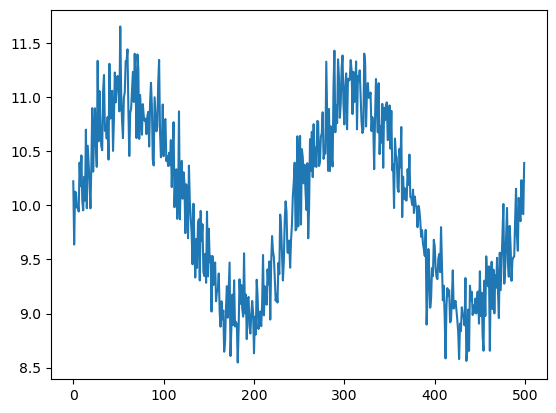

In [2]:
noisy_signal =np.sin(2*np.linspace(0, 2 * np.pi, 500)) + np.random.normal(0, 0.25, 500)+10

plt.plot(noisy_signal)

### Sample TF Problem

Below we solve the TF problem for a sample of data. It utilizes a primal dual interior point method originally suggested by Boyd.

An exponentially spaced grid is used for potential lambda values. 1-fold cross validation is used to select the best lambda value. 

In [3]:
D=Difference_Matrix(500,1)
best_lambda=cross_validation(noisy_signal.reshape(-1,1),D,cv_folds=15,cv_iterations=1)

Performing  0 out of 1 iterations of cross validation
Performing cross validation for lambda = 0.24089512931672216
Performing cross validation for lambda = 0.4650956790708322
Performing cross validation for lambda = 0.8979591712954684
Performing cross validation for lambda = 1.7336877326500477
Performing cross validation for lambda = 3.3472269680201974
Performing cross validation for lambda = 6.462483505213361
Performing cross validation for lambda = 12.47710222646091
Performing cross validation for lambda = 24.089512931672218
Performing cross validation for lambda = 46.509567907083216
Performing cross validation for lambda = 89.79591712954685
Performing cross validation for lambda = 173.3687732650046
Performing cross validation for lambda = 334.72269680201975
Performing cross validation for lambda = 646.2483505213361
Performing cross validation for lambda = 1247.7102226460897
Performing cross validation for lambda = 2408.9512931672216


In [4]:
results=adaptive_tf(noisy_signal.reshape(-1,1),D,lambda_p=best_lambda)

### Let's Visualize results

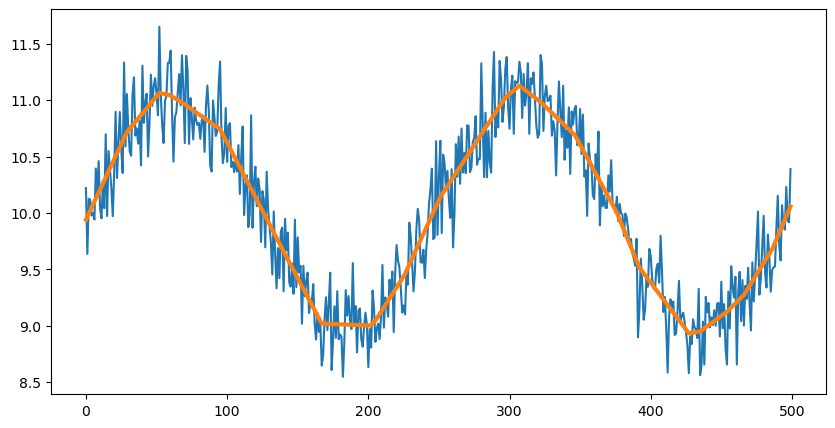

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(results["sol"].x, label="Adaptive TF",lw=3)

### Construction of Falling Factorial Basis

The falling factorial basis has similar properties to splines and is constructed as follows:

$$ h_{j}(x)=\prod_{i=1}^{j-1} (x-x_l) \quad j=1, \ldots , k+1 $$
$$ h_{k+1+j}(x) = \prod_{i=1}^{k} (x-x_{j+l}) \ 1{x \geq x_{j+k}} \quad j=1 \ldots , n-k-1 $$

such that $h_1(x)=1$

The difference is that the falling factorial basis does not require continuity of derivatives at the knots

In [6]:
x_tf=results["sol"].x

t=np.arange(1,501)

ffb=Falling_Factorial_Basis(t,1)

print(ffb.h_j_x(np.array([1.5])))

print(f"Shape of h_j_x: {ffb.h_j_x(np.array([1.5])).shape}")


[[1. ]
 [0.5]]
Shape of h_j_x: (2, 1)


In [7]:
print(ffb.h_k_j_x(np.array([15])))

print(f"Shape of h_k_j_x: {ffb.h_k_j_x(np.array([1.5])).shape}")


[[14.]
 [13.]
 [12.]
 [11.]
 [10.]
 [ 9.]
 [ 8.]
 [ 7.]
 [ 6.]
 [ 5.]
 [ 4.]
 [ 3.]
 [ 2.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]

### Continous TF Evaluation

In [8]:
ctf=Continous_TF(x_tf,D,D.k)

print(f"Number of phi coefficients: {len(ctf.phi)}")

print(f"Phi coefficients: {ctf.phi}")

print(f"Number of theta coefficients: {len(ctf.theta)}")

print(f"Theta coefficients: {ctf.theta}")


Number of phi coefficients: 2
Phi coefficients: [[9.94093902]
 [0.02679404]]
Number of theta coefficients: 498
Theta coefficients: [[ 2.13873363e-11]
 [ 1.75415238e-11]
 [ 2.38369324e-11]
 [ 3.75646181e-11]
 [ 4.59561278e-11]
 [ 4.85496088e-11]
 [ 3.83302279e-11]
 [ 4.94733143e-11]
 [ 6.27178309e-11]
 [ 1.02696518e-10]
 [ 1.31096911e-10]
 [ 1.29444899e-10]
 [ 1.27794664e-10]
 [ 1.00495612e-10]
 [ 1.12798659e-10]
 [ 8.83773055e-11]
 [ 8.21280821e-11]
 [ 7.53352936e-11]
 [ 5.16173770e-11]
 [-7.20490334e-12]
 [-7.77582443e-11]
 [-1.25165656e-10]
 [-2.22545538e-10]
 [-3.81781717e-10]
 [-5.29833954e-10]
 [-8.57630411e-10]
 [-1.30131603e-08]
 [-8.63051142e-09]
 [-1.17110846e-02]
 [-2.41766784e-09]
 [-1.13531051e-09]
 [-9.82176118e-10]
 [-1.42002321e-09]
 [-1.14835608e-09]
 [-5.41733769e-10]
 [-3.65911745e-10]
 [-2.78683743e-10]
 [-2.59101185e-10]
 [-2.48853382e-10]
 [-3.49311691e-10]
 [-3.41263018e-10]
 [-3.64570596e-10]
 [-3.67766262e-10]
 [-3.30098615e-10]
 [-4.47974102e-10]
 [-8.16118728e

In [9]:
x_tf[0]-x_tf[1]

array([-0.02679404])

In [10]:
ctf.h_j_x(np.array([105.55]))


array([[  1.  ],
       [104.55]])

### Let's Visualize the Coefficients

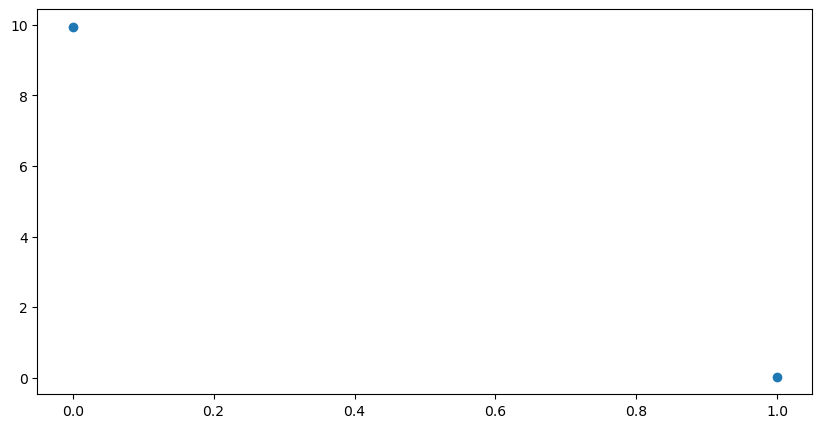

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.phi)),ctf.phi,label="phi")

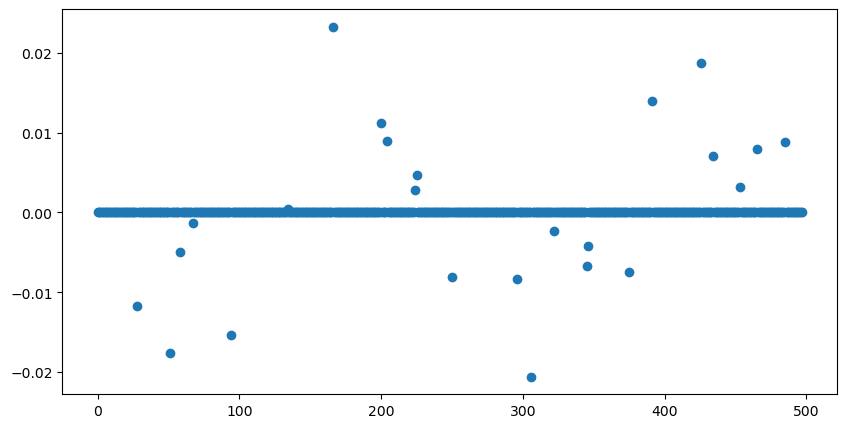

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(np.arange(0,len(ctf.theta)),ctf.theta,label="theta")


### Continous TF Evaluation

First examine the Time Difference Matrix. This is just the standard difference matrix as we are equally spaced time

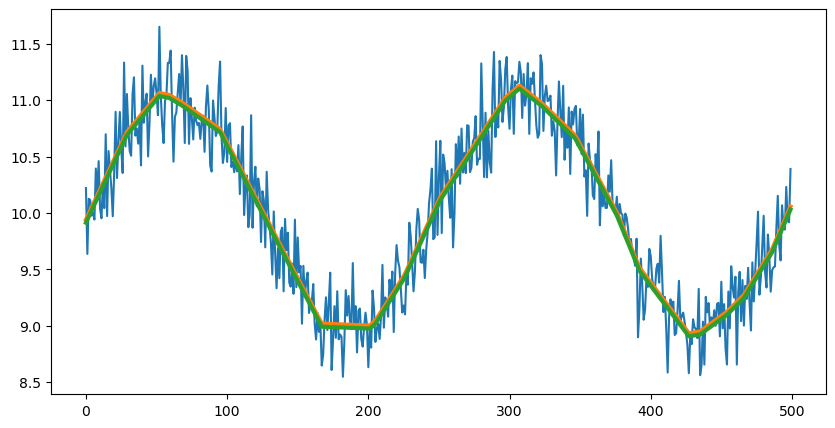

In [13]:
x_equal=np.arange(0,500)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(results["sol"].x, label="Adaptive TF",lw=3)
ax.plot(ctf.evaluate_tf(x_equal),label="Continous TF",lw=3)


### Constant Trend Filtering

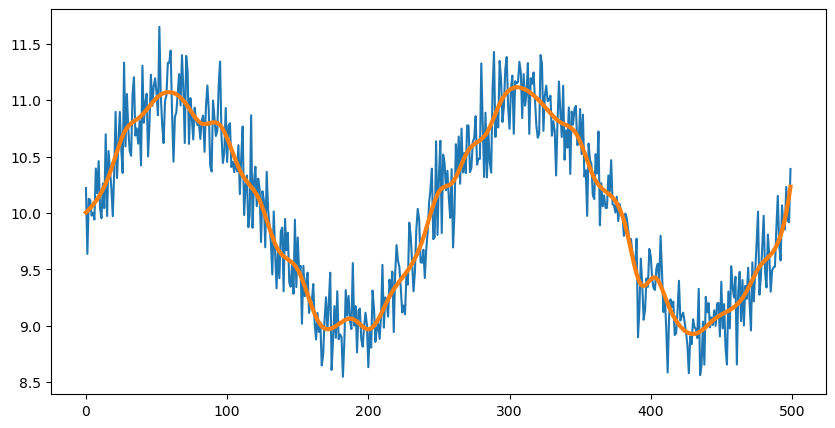

In [17]:
D=Difference_Matrix(500,3,t=np.arange(1,501))


results=adaptive_tf(noisy_signal.reshape(-1,1),D,lambda_p=10)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(results["sol"].x, label="Adaptive TF",lw=3)



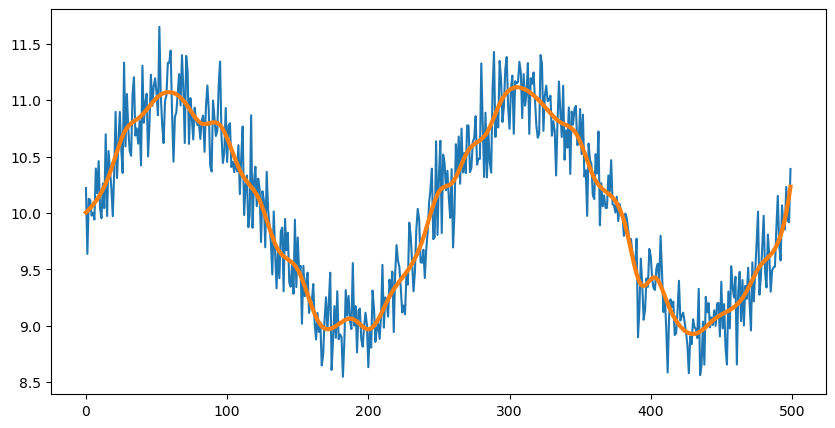

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(results["sol"].x, label="Adaptive TF",lw=3)


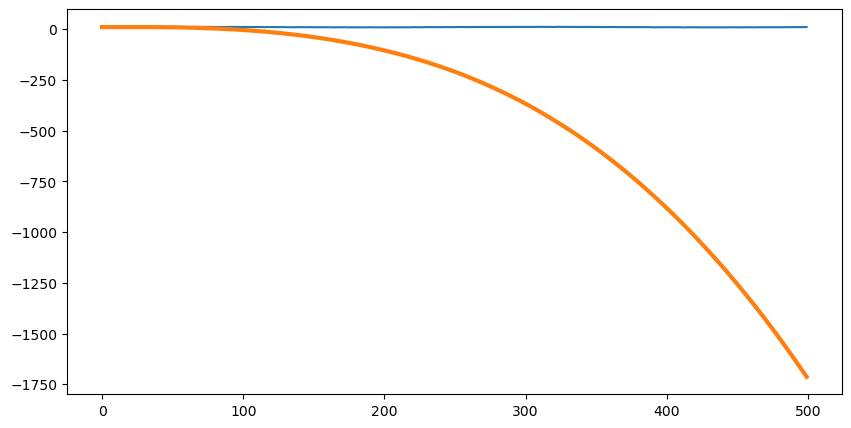

In [19]:
predictions=results["sol"].predict(np.arange(1,501))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(noisy_signal, label="Noisy Signal")
ax.plot(predictions, label="Adaptive TF",lw=3)


### References

- The Falling Factorial Basis and Its Statistical Applications https://proceedings.mlr.press/v32/wange14.html
- Fast and Flexible ADMM Algorithms for Trend Filtering https://www.tandfonline.com/doi/full/10.1080/10618600.2015.1054033
